In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras import layers
!pip install Pillow
import PIL

!pip install imageio
import imageio

In [2]:
images_dir = 'archive/seg_train/seg_train'
class_names = os.listdir(images_dir)
n_classes = len(class_names)

In [3]:
class_names

['glacier', 'forest', 'street', 'buildings', 'mountain', 'sea']

In [4]:
n_classes

6

In [5]:
preprocess_gen = ImageDataGenerator(rescale=1./255.,
                                   #rotation_range=45,
                                   #width_shift_range=0.5,
                                   #height_shift_range=0.5,
                                   shear_range=5,
                                   #zoom_range=0.7,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                  )

In [6]:
batch_size = 16

In [7]:
train_generator_l = preprocess_gen.flow_from_directory(
    directory='archive/seg_train/seg_train',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    classes=class_names)

valid_generator_l = preprocess_gen.flow_from_directory(
    directory='archive/seg_test/seg_test',
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    classes=class_names)  

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


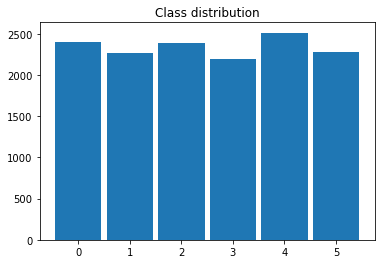

In [8]:
plt.hist(train_generator_l.classes, 
         bins=np.array([0, 1, 2, 3, 4, 5, 6])-0.5, rwidth=0.9)
plt.title('Class distribution');

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


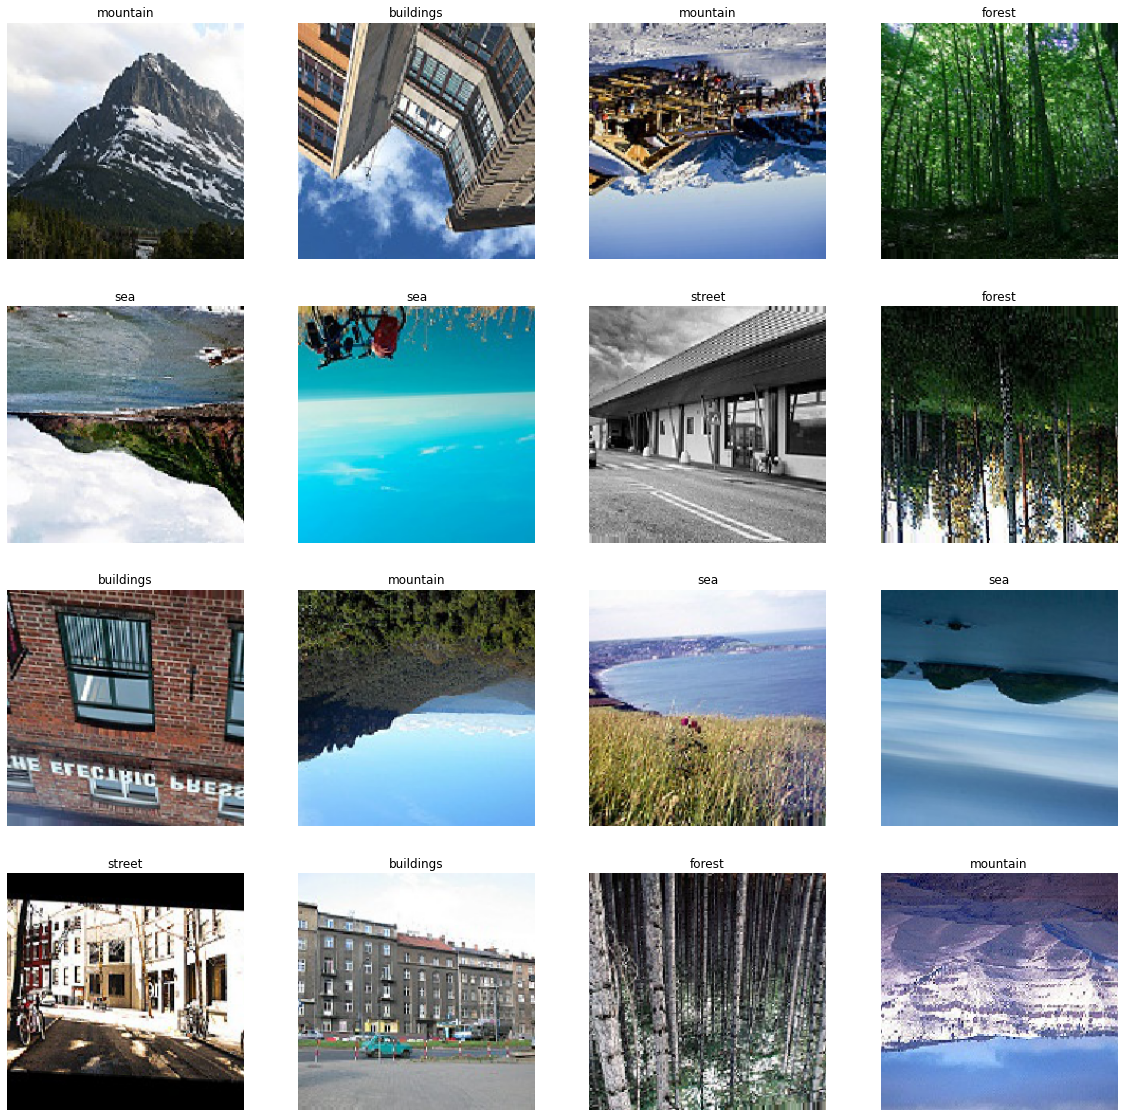

In [9]:

plt.figure(figsize=(20, 20))
for image, label in train_generator_l:
 

  
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ax.imshow(image[i])
    ax.set_title(class_names[np.argmax(label[i])])
    ax.axis("off")
  break


In [ ]:
image

(150, 150, 3)

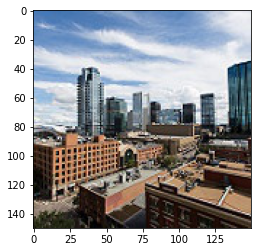

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open('archive/seg_train/seg_train/buildings/10006.jpg') #These two lines
im_arr = np.array(im) #are all you need
plt.imshow(im_arr) #Just to verify that image array has been constructed properly
im_arr.shape


In [11]:
import glob

In [12]:
trainingsbilder = glob.glob("archive/seg_train/seg_train/*/*.jpg")

In [13]:
len(trainingsbilder)

14034

In [16]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump

In [ ]:
bilderstapel_3925=[]
for k in trainingsbilder[3925:14034]:  
    
   
    # load an image from file
    image = load_img(k, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # load model
    model = VGG16()
    # remove the output layer
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # get extracted features
    features = model.predict(image)
    features = np.append(features, k)
    bilderstapel_3925.append(features)
    print(k)
    print(len(bilderstapel_3925))
    # save to file
    #dump(features, open('dog.pkl', 'wb'))
    print(features)

archive/seg_train/seg_train/forest/4165.jpg
1
['1.5633668' '2.433125' '0.0' ... '1.6682379' '0.0'
 'archive/seg_train/seg_train/forest/4165.jpg']
archive/seg_train/seg_train/forest/17706.jpg
2
['1.2614262' '0.0' '0.0' ... '2.816241' '0.0'
 'archive/seg_train/seg_train/forest/17706.jpg']
archive/seg_train/seg_train/forest/6389.jpg
3
['2.3723016' '2.4545898' '0.0' ... '1.3462706' '0.0'
 'archive/seg_train/seg_train/forest/6389.jpg']
archive/seg_train/seg_train/forest/18417.jpg
4
['1.5778615' '0.84479797' '0.0' ... '0.81895125' '0.0'
 'archive/seg_train/seg_train/forest/18417.jpg']
archive/seg_train/seg_train/forest/10441.jpg
5
['2.5626988' '2.8133724' '0.0' ... '3.3427346' '0.0'
 'archive/seg_train/seg_train/forest/10441.jpg']
archive/seg_train/seg_train/forest/15522.jpg
6
['0.076643825' '1.040729' '0.0' ... '0.20670204' '0.0'
 'archive/seg_train/seg_train/forest/15522.jpg']
archive/seg_train/seg_train/forest/8047.jpg
7
['0.019095123' '0.0' '0.0' ... '0.6098508' '0.5039822'
 'archive/seg

archive/seg_train/seg_train/forest/19206.jpg
10
['0.0' '1.1963477' '0.0' ... '0.8089561' '0.22604325'
 'archive/seg_train/seg_train/forest/19206.jpg']
archive/seg_train/seg_train/forest/5786.jpg
11
['0.9724712' '0.0' '0.0' ... '2.0725305' '0.0'
 'archive/seg_train/seg_train/forest/5786.jpg']
archive/seg_train/seg_train/forest/16153.jpg
12
['2.3205647' '2.116792' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/16153.jpg']
archive/seg_train/seg_train/forest/7899.jpg
13
['1.1735227' '0.40503544' '0.0' ... '0.30170235' '0.0'
 'archive/seg_train/seg_train/forest/7899.jpg']
archive/seg_train/seg_train/forest/17811.jpg
14
['3.6492682' '2.777957' '0.0' ... '4.904135' '0.0'
 'archive/seg_train/seg_train/forest/17811.jpg']
archive/seg_train/seg_train/forest/13582.jpg
15
['0.0' '1.8229284' '0.0' ... '1.7634602' '0.0'
 'archive/seg_train/seg_train/forest/13582.jpg']
archive/seg_train/seg_train/forest/722.jpg
16
['0.1593017' '0.0' '1.8992428' ... '0.92960256' '0.0'
 'archive/seg_train/se

archive/seg_train/seg_train/forest/15882.jpg
20
['1.3047404' '2.6420264' '0.0' ... '1.7267017' '0.0'
 'archive/seg_train/seg_train/forest/15882.jpg']
archive/seg_train/seg_train/forest/13268.jpg
21
['2.3989115' '1.8928754' '0.0' ... '1.7682216' '0.0'
 'archive/seg_train/seg_train/forest/13268.jpg']
archive/seg_train/seg_train/forest/3780.jpg
22
['0.0' '2.2905867' '0.50349957' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/3780.jpg']
archive/seg_train/seg_train/forest/2131.jpg
23
['2.5819697' '2.0270395' '0.0' ... '1.3285017' '0.0'
 'archive/seg_train/seg_train/forest/2131.jpg']
archive/seg_train/seg_train/forest/16646.jpg
24
['1.7344182' '0.0' '0.0' ... '2.0124369' '0.0'
 'archive/seg_train/seg_train/forest/16646.jpg']
archive/seg_train/seg_train/forest/1915.jpg
25
['0.54596895' '0.0' '0.0' ... '0.23005751' '0.0'
 'archive/seg_train/seg_train/forest/1915.jpg']
archive/seg_train/seg_train/forest/115.jpg
26
['0.6470092' '1.1134934' '0.0' ... '0.82554924' '0.0'
 'archive/seg_train/s

archive/seg_train/seg_train/forest/1670.jpg
30
['2.1522589' '2.6911945' '0.0' ... '4.5857787' '0.0'
 'archive/seg_train/seg_train/forest/1670.jpg']
archive/seg_train/seg_train/forest/14951.jpg
31
['3.1152277' '1.9303095' '0.0' ... '2.1656275' '0.0'
 'archive/seg_train/seg_train/forest/14951.jpg']
archive/seg_train/seg_train/forest/10713.jpg
32
['1.958895' '1.3243487' '0.0' ... '3.245782' '0.0'
 'archive/seg_train/seg_train/forest/10713.jpg']
archive/seg_train/seg_train/forest/10497.jpg
33
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/10497.jpg']
archive/seg_train/seg_train/forest/1025.jpg
34
['0.1365965' '0.0' '0.0' ... '0.37196934' '0.0'
 'archive/seg_train/seg_train/forest/1025.jpg']
archive/seg_train/seg_train/forest/4426.jpg
35
['0.59204215' '2.5523775' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/4426.jpg']
archive/seg_train/seg_train/forest/5074.jpg
36
['1.1585495' '0.023009151' '0.00438416' ... '0.0' '0.0'
 'archive/seg_train/seg_train/for

archive/seg_train/seg_train/forest/9473.jpg
40
['0.3199627' '0.10835084' '0.0' ... '2.5951421' '0.0'
 'archive/seg_train/seg_train/forest/9473.jpg']
archive/seg_train/seg_train/forest/2049.jpg
41
['0.24357074' '1.615159' '0.0' ... '2.1107686' '0.0'
 'archive/seg_train/seg_train/forest/2049.jpg']
archive/seg_train/seg_train/forest/5378.jpg
42
['1.7436532' '0.30941057' '0.0' ... '2.9708447' '0.0'
 'archive/seg_train/seg_train/forest/5378.jpg']
archive/seg_train/seg_train/forest/13884.jpg
43
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/13884.jpg']
archive/seg_train/seg_train/forest/8689.jpg
44
['1.5508873' '0.5518321' '0.0' ... '0.33770725' '0.0'
 'archive/seg_train/seg_train/forest/8689.jpg']
archive/seg_train/seg_train/forest/11074.jpg
45
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/11074.jpg']
archive/seg_train/seg_train/forest/6061.jpg
46
['0.0' '0.0' '0.0' ... '2.2324424' '0.0'
 'archive/seg_train/seg_train/forest/6061.jpg']
archi

archive/seg_train/seg_train/forest/11921.jpg
50
['0.0' '0.0' '0.0' ... '0.44924515' '0.0'
 'archive/seg_train/seg_train/forest/11921.jpg']
archive/seg_train/seg_train/forest/13388.jpg
51
['0.9992577' '0.0' '0.0' ... '1.2211862' '0.0'
 'archive/seg_train/seg_train/forest/13388.jpg']
archive/seg_train/seg_train/forest/9418.jpg
52
['2.8055496' '2.6258228' '0.0' ... '2.1082835' '0.0'
 'archive/seg_train/seg_train/forest/9418.jpg']
archive/seg_train/seg_train/forest/11076.jpg
53
['0.0' '0.5325305' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/11076.jpg']
archive/seg_train/seg_train/forest/11041.jpg
54
['2.2751062' '0.0' '0.0' ... '0.78126407' '0.0'
 'archive/seg_train/seg_train/forest/11041.jpg']
archive/seg_train/seg_train/forest/9262.jpg
55
['0.58087033' '1.0381972' '0.0' ... '0.23343815' '0.0'
 'archive/seg_train/seg_train/forest/9262.jpg']
archive/seg_train/seg_train/forest/12743.jpg
56
['0.088000536' '0.0' '0.0' ... '2.0564454' '0.0'
 'archive/seg_train/seg_train/forest/12

archive/seg_train/seg_train/forest/4301.jpg
60
['2.5195603' '0.0' '0.0' ... '0.22206378' '0.0'
 'archive/seg_train/seg_train/forest/4301.jpg']
archive/seg_train/seg_train/forest/15481.jpg
61
['1.8766396' '1.0753849' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/15481.jpg']
archive/seg_train/seg_train/forest/10242.jpg
62
['0.045526028' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/10242.jpg']
archive/seg_train/seg_train/forest/12125.jpg
63
['1.6532819' '4.0576453' '0.0' ... '0.9498106' '0.0'
 'archive/seg_train/seg_train/forest/12125.jpg']
archive/seg_train/seg_train/forest/4543.jpg
64
['0.0' '0.0' '0.0' ... '1.2500772' '0.0'
 'archive/seg_train/seg_train/forest/4543.jpg']
archive/seg_train/seg_train/forest/17396.jpg
65
['0.0' '0.0' '0.0' ... '0.86978877' '0.0'
 'archive/seg_train/seg_train/forest/17396.jpg']
archive/seg_train/seg_train/forest/10387.jpg
66
['0.0' '0.0' '0.0' ... '2.5530589' '0.0'
 'archive/seg_train/seg_train/forest/10387.jpg']
archive/se

archive/seg_train/seg_train/forest/13973.jpg
70
['1.0790523' '2.1165586' '0.0' ... '1.343576' '0.0'
 'archive/seg_train/seg_train/forest/13973.jpg']
archive/seg_train/seg_train/forest/1369.jpg
71
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/1369.jpg']
archive/seg_train/seg_train/forest/269.jpg
72
['0.0' '0.0' '0.0' ... '0.89170617' '0.0'
 'archive/seg_train/seg_train/forest/269.jpg']
archive/seg_train/seg_train/forest/17378.jpg
73
['0.94392955' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/17378.jpg']
archive/seg_train/seg_train/forest/2127.jpg
74
['1.1692386' '1.0210629' '0.0' ... '1.7398467' '0.0'
 'archive/seg_train/seg_train/forest/2127.jpg']
archive/seg_train/seg_train/forest/430.jpg
75
['3.1384072' '0.29197943' '0.613212' ... '0.9650916' '0.0'
 'archive/seg_train/seg_train/forest/430.jpg']
archive/seg_train/seg_train/forest/8219.jpg
76
['0.27975345' '2.6349375' '0.0' ... '2.0865397' '0.0'
 'archive/seg_train/seg_train/forest/8219.jpg'

archive/seg_train/seg_train/forest/479.jpg
80
['0.0' '0.8830878' '0.0' ... '1.9148366' '0.0'
 'archive/seg_train/seg_train/forest/479.jpg']
archive/seg_train/seg_train/forest/18038.jpg
81
['0.0' '0.0' '0.0' ... '1.4347098' '0.0'
 'archive/seg_train/seg_train/forest/18038.jpg']
archive/seg_train/seg_train/forest/4738.jpg
82
['0.6089891' '0.46885428' '0.0' ... '2.753783' '0.0'
 'archive/seg_train/seg_train/forest/4738.jpg']
archive/seg_train/seg_train/forest/13274.jpg
83
['1.510958' '1.1026362' '0.0' ... '0.82141876' '0.0'
 'archive/seg_train/seg_train/forest/13274.jpg']
archive/seg_train/seg_train/forest/3121.jpg
84
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/3121.jpg']
archive/seg_train/seg_train/forest/15721.jpg
85
['3.801413' '0.5600152' '0.0' ... '3.5955138' '0.0'
 'archive/seg_train/seg_train/forest/15721.jpg']
archive/seg_train/seg_train/forest/18161.jpg
86
['0.8426173' '1.7789614' '0.0' ... '1.2383246' '0.0'
 'archive/seg_train/seg_train/forest/18161.j

archive/seg_train/seg_train/forest/8696.jpg
90
['0.0' '0.4356872' '0.0' ... '0.3662193' '0.0'
 'archive/seg_train/seg_train/forest/8696.jpg']
archive/seg_train/seg_train/forest/2520.jpg
91
['0.8747621' '0.3812489' '0.0' ... '0.47321594' '0.0'
 'archive/seg_train/seg_train/forest/2520.jpg']
archive/seg_train/seg_train/forest/13002.jpg
92
['0.9489926' '0.82473505' '0.0' ... '1.3852355' '0.0'
 'archive/seg_train/seg_train/forest/13002.jpg']
archive/seg_train/seg_train/forest/13726.jpg
93
['1.2500002' '1.0586882' '0.0' ... '1.0726414' '0.0'
 'archive/seg_train/seg_train/forest/13726.jpg']
archive/seg_train/seg_train/forest/15681.jpg
94
['0.0' '0.0' '0.0' ... '1.8031044' '0.0'
 'archive/seg_train/seg_train/forest/15681.jpg']
archive/seg_train/seg_train/forest/2091.jpg
95
['1.0527375' '2.0847876' '0.0' ... '1.727282' '0.0'
 'archive/seg_train/seg_train/forest/2091.jpg']
archive/seg_train/seg_train/forest/9166.jpg
96
['0.8168797' '5.164771' '0.0' ... '2.4389718' '0.0'
 'archive/seg_train/seg_

archive/seg_train/seg_train/forest/8913.jpg
100
['2.891189' '0.0' '0.0' ... '3.652437' '0.0'
 'archive/seg_train/seg_train/forest/8913.jpg']
archive/seg_train/seg_train/forest/14495.jpg
101
['0.6816119' '0.0' '0.0' ... '1.0037491' '0.0'
 'archive/seg_train/seg_train/forest/14495.jpg']
archive/seg_train/seg_train/forest/4181.jpg
102
['3.1041517' '0.0' '0.0' ... '3.9626224' '0.0'
 'archive/seg_train/seg_train/forest/4181.jpg']
archive/seg_train/seg_train/forest/8338.jpg
103
['2.4680939' '1.2162372' '0.0' ... '0.48681346' '0.0'
 'archive/seg_train/seg_train/forest/8338.jpg']
archive/seg_train/seg_train/forest/4723.jpg
104
['0.0' '1.7686516' '0.35784417' ... '0.9622035' '0.0'
 'archive/seg_train/seg_train/forest/4723.jpg']
archive/seg_train/seg_train/forest/3687.jpg
105
['0.3712283' '0.0' '0.0' ... '0.09678733' '0.0'
 'archive/seg_train/seg_train/forest/3687.jpg']
archive/seg_train/seg_train/forest/18507.jpg
106
['1.0060551' '1.6614758' '0.0' ... '2.0924752' '0.0'
 'archive/seg_train/seg_t

archive/seg_train/seg_train/forest/5879.jpg
110
['3.1132832' '2.0182586' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/5879.jpg']
archive/seg_train/seg_train/forest/17838.jpg
111
['0.26310864' '0.0' '0.0' ... '1.1280696' '0.35480475'
 'archive/seg_train/seg_train/forest/17838.jpg']
archive/seg_train/seg_train/forest/16755.jpg
112
['0.0' '0.0' '0.0' ... '0.5844508' '0.0'
 'archive/seg_train/seg_train/forest/16755.jpg']
archive/seg_train/seg_train/forest/6004.jpg
113
['0.92919946' '0.82203686' '0.0' ... '1.5268569' '0.0'
 'archive/seg_train/seg_train/forest/6004.jpg']
archive/seg_train/seg_train/forest/6252.jpg
114
['0.0' '0.40443304' '0.0' ... '1.5848632' '0.0'
 'archive/seg_train/seg_train/forest/6252.jpg']
archive/seg_train/seg_train/forest/18567.jpg
115
['0.3344397' '4.0166903' '0.0' ... '3.4121423' '0.0'
 'archive/seg_train/seg_train/forest/18567.jpg']
archive/seg_train/seg_train/forest/8539.jpg
116
['0.0' '0.0' '0.0' ... '0.3674309' '0.0'
 'archive/seg_train/seg_train/

archive/seg_train/seg_train/forest/10235.jpg
120
['1.7641939' '0.0' '0.0' ... '3.7173765' '0.0'
 'archive/seg_train/seg_train/forest/10235.jpg']
archive/seg_train/seg_train/forest/7629.jpg
121
['0.06673449' '0.70036435' '0.0' ... '0.98344016' '0.43681893'
 'archive/seg_train/seg_train/forest/7629.jpg']
archive/seg_train/seg_train/forest/317.jpg
122
['0.6790378' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/317.jpg']
archive/seg_train/seg_train/forest/13819.jpg
123
['2.0074427' '1.819386' '0.0' ... '0.99400294' '0.0'
 'archive/seg_train/seg_train/forest/13819.jpg']
archive/seg_train/seg_train/forest/5899.jpg
124
['0.6509686' '1.0810513' '0.9391948' ... '2.2139325' '1.0922327'
 'archive/seg_train/seg_train/forest/5899.jpg']
archive/seg_train/seg_train/forest/17170.jpg
125
['1.5864707' '1.9077067' '0.0' ... '3.317303' '0.0'
 'archive/seg_train/seg_train/forest/17170.jpg']
archive/seg_train/seg_train/forest/2909.jpg
126
['0.0' '1.2864053' '0.62063426' ... '2.7687092' '0.

archive/seg_train/seg_train/forest/758.jpg
130
['1.7464372' '0.9481876' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/758.jpg']
archive/seg_train/seg_train/forest/10533.jpg
131
['0.49980247' '1.2590024' '0.0' ... '1.7831569' '0.0'
 'archive/seg_train/seg_train/forest/10533.jpg']
archive/seg_train/seg_train/forest/9419.jpg
132
['2.2401795' '0.8556409' '0.0' ... '2.9066238' '0.0'
 'archive/seg_train/seg_train/forest/9419.jpg']
archive/seg_train/seg_train/forest/17855.jpg
133
['0.0' '0.8120538' '0.0' ... '1.8950799' '0.0'
 'archive/seg_train/seg_train/forest/17855.jpg']
archive/seg_train/seg_train/forest/2831.jpg
134
['1.3687117' '0.0' '0.0' ... '0.2952169' '0.0'
 'archive/seg_train/seg_train/forest/2831.jpg']
archive/seg_train/seg_train/forest/16255.jpg
135
['0.0' '1.2531224' '0.0' ... '1.3957052' '0.0'
 'archive/seg_train/seg_train/forest/16255.jpg']
archive/seg_train/seg_train/forest/7616.jpg
136
['1.3924103' '0.0' '0.0' ... '1.8035097' '0.0'
 'archive/seg_train/seg_train/

archive/seg_train/seg_train/forest/4581.jpg
140
['1.7930884' '0.0' '0.0' ... '0.9107935' '0.0'
 'archive/seg_train/seg_train/forest/4581.jpg']
archive/seg_train/seg_train/forest/8064.jpg
141
['0.33978844' '0.07054356' '0.0' ... '0.8440081' '0.26495206'
 'archive/seg_train/seg_train/forest/8064.jpg']
archive/seg_train/seg_train/forest/10281.jpg
142
['0.0' '0.7798133' '0.9605813' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/10281.jpg']
archive/seg_train/seg_train/forest/18690.jpg
143
['1.2277768' '1.6879637' '0.0' ... '1.3727291' '0.0'
 'archive/seg_train/seg_train/forest/18690.jpg']
archive/seg_train/seg_train/forest/4096.jpg
144
['1.273701' '2.1186423' '0.0' ... '0.7130513' '0.0'
 'archive/seg_train/seg_train/forest/4096.jpg']
archive/seg_train/seg_train/forest/12855.jpg
145
['3.0571165' '3.1635787' '0.0' ... '2.1642952' '0.0'
 'archive/seg_train/seg_train/forest/12855.jpg']
archive/seg_train/seg_train/forest/15741.jpg
146
['0.54127836' '1.0407529' '0.0' ... '1.14642' '0.0'
 'a

archive/seg_train/seg_train/forest/2888.jpg
150
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/2888.jpg']
archive/seg_train/seg_train/forest/9462.jpg
151
['3.3728132' '1.9173129' '0.0' ... '1.9078679' '0.0'
 'archive/seg_train/seg_train/forest/9462.jpg']
archive/seg_train/seg_train/forest/10197.jpg
152
['0.52345586' '2.952829' '0.0' ... '2.0749936' '0.0'
 'archive/seg_train/seg_train/forest/10197.jpg']
archive/seg_train/seg_train/forest/13423.jpg
153
['0.0' '0.43701443' '0.0' ... '1.4750412' '0.0'
 'archive/seg_train/seg_train/forest/13423.jpg']
archive/seg_train/seg_train/forest/9323.jpg
154
['0.6347954' '1.4185449' '0.45381683' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/9323.jpg']
archive/seg_train/seg_train/forest/14249.jpg
155
['1.0213587' '1.3401856' '0.0' ... '0.47463825' '0.0'
 'archive/seg_train/seg_train/forest/14249.jpg']
archive/seg_train/seg_train/forest/10751.jpg
156
['0.0' '1.190949' '0.0' ... '1.3821619' '0.0'
 'archive/seg_train/seg_tr

archive/seg_train/seg_train/forest/14047.jpg
160
['1.8383077' '0.31575215' '0.0' ... '1.0997288' '0.0'
 'archive/seg_train/seg_train/forest/14047.jpg']
archive/seg_train/seg_train/forest/10597.jpg
161
['2.8907938' '1.3845146' '0.0' ... '1.9078021' '0.0'
 'archive/seg_train/seg_train/forest/10597.jpg']
archive/seg_train/seg_train/forest/3450.jpg
162
['1.4933702' '2.3774245' '0.0' ... '1.4372623' '0.0'
 'archive/seg_train/seg_train/forest/3450.jpg']
archive/seg_train/seg_train/forest/1195.jpg
163
['0.51557165' '2.3446443' '0.0' ... '4.0392404' '0.0'
 'archive/seg_train/seg_train/forest/1195.jpg']
archive/seg_train/seg_train/forest/9013.jpg
164
['2.1221786' '0.0' '0.0' ... '0.25251424' '0.0'
 'archive/seg_train/seg_train/forest/9013.jpg']
archive/seg_train/seg_train/forest/11764.jpg
165
['1.1964463' '0.0' '0.0' ... '1.2368712' '0.0'
 'archive/seg_train/seg_train/forest/11764.jpg']
archive/seg_train/seg_train/forest/16998.jpg
166
['0.6558682' '3.161744' '0.0' ... '1.3489618' '0.0'
 'archiv

archive/seg_train/seg_train/forest/9632.jpg
170
['2.0994854' '0.0' '0.0' ... '1.4161241' '0.0'
 'archive/seg_train/seg_train/forest/9632.jpg']
archive/seg_train/seg_train/forest/18572.jpg
171
['0.5449151' '0.8536247' '0.0' ... '2.1018243' '0.0'
 'archive/seg_train/seg_train/forest/18572.jpg']
archive/seg_train/seg_train/forest/12646.jpg
172
['0.0' '2.4851193' '0.06963569' ... '0.19980194' '0.33313033'
 'archive/seg_train/seg_train/forest/12646.jpg']
archive/seg_train/seg_train/forest/17642.jpg
173
['0.793633' '0.6598396' '0.4588828' ... '1.0879176' '0.0'
 'archive/seg_train/seg_train/forest/17642.jpg']
archive/seg_train/seg_train/forest/1530.jpg
174
['1.7945455' '2.5652418' '0.0' ... '1.6084924' '0.0'
 'archive/seg_train/seg_train/forest/1530.jpg']
archive/seg_train/seg_train/forest/13157.jpg
175
['0.0' '0.66071' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/13157.jpg']
archive/seg_train/seg_train/forest/8537.jpg
176
['1.2060324' '2.4259307' '0.0' ... '0.87095875' '0.0'
 '

archive/seg_train/seg_train/forest/1957.jpg
180
['1.1966808' '1.3838896' '0.0' ... '2.4301722' '0.0'
 'archive/seg_train/seg_train/forest/1957.jpg']
archive/seg_train/seg_train/forest/8950.jpg
181
['4.190492' '3.8281815' '0.0' ... '2.1526127' '0.0'
 'archive/seg_train/seg_train/forest/8950.jpg']
archive/seg_train/seg_train/forest/15310.jpg
182
['0.64651465' '1.6095054' '0.0' ... '1.5081637' '0.0'
 'archive/seg_train/seg_train/forest/15310.jpg']
archive/seg_train/seg_train/forest/3737.jpg
183
['1.8070211' '2.2146611' '0.0' ... '1.7642577' '0.0'
 'archive/seg_train/seg_train/forest/3737.jpg']
archive/seg_train/seg_train/forest/9504.jpg
184
['2.8497767' '2.951559' '0.0' ... '0.23873913' '0.0'
 'archive/seg_train/seg_train/forest/9504.jpg']
archive/seg_train/seg_train/forest/3494.jpg
185
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/3494.jpg']
archive/seg_train/seg_train/forest/13687.jpg
186
['0.5741111' '0.094335735' '0.0' ... '0.47432336' '0.0'
 'archive/seg_tra

archive/seg_train/seg_train/forest/18928.jpg
190
['1.6414359' '0.6968763' '0.0' ... '1.1080428' '0.0'
 'archive/seg_train/seg_train/forest/18928.jpg']
archive/seg_train/seg_train/forest/12610.jpg
191
['0.116870046' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/12610.jpg']
archive/seg_train/seg_train/forest/11977.jpg
192
['0.29043373' '0.3081301' '0.66717947' ... '1.9109411' '0.5789535'
 'archive/seg_train/seg_train/forest/11977.jpg']
archive/seg_train/seg_train/forest/16648.jpg
193
['2.7183008' '2.2744293' '0.0' ... '2.8067374' '0.0'
 'archive/seg_train/seg_train/forest/16648.jpg']
archive/seg_train/seg_train/forest/13637.jpg
194
['0.0' '2.1698306' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/13637.jpg']
archive/seg_train/seg_train/forest/14452.jpg
195
['2.148559' '2.703702' '0.0' ... '1.1085675' '0.0'
 'archive/seg_train/seg_train/forest/14452.jpg']
archive/seg_train/seg_train/forest/3852.jpg
196
['0.9333044' '0.0' '0.0' ... '0.9434802' '0.0'
 'archive

archive/seg_train/seg_train/forest/1552.jpg
200
['0.0' '0.0' '0.012460172' ... '3.0192084' '0.0'
 'archive/seg_train/seg_train/forest/1552.jpg']
archive/seg_train/seg_train/forest/5109.jpg
201
['0.0' '1.7982649' '1.6255417' ... '0.38034388' '0.0'
 'archive/seg_train/seg_train/forest/5109.jpg']
archive/seg_train/seg_train/forest/8980.jpg
202
['1.2295215' '2.166643' '0.0' ... '1.9162934' '0.0'
 'archive/seg_train/seg_train/forest/8980.jpg']
archive/seg_train/seg_train/forest/639.jpg
203
['0.0' '0.0' '0.0' ... '0.5416972' '0.0'
 'archive/seg_train/seg_train/forest/639.jpg']
archive/seg_train/seg_train/forest/7345.jpg
204
['0.0' '1.0942556' '0.8260651' ... '1.3592204' '0.39416045'
 'archive/seg_train/seg_train/forest/7345.jpg']
archive/seg_train/seg_train/forest/16032.jpg
205
['0.981556' '0.0' '0.0' ... '0.8116212' '0.0'
 'archive/seg_train/seg_train/forest/16032.jpg']
archive/seg_train/seg_train/forest/13536.jpg
206
['2.822568' '1.3313028' '0.0' ... '3.0869489' '0.0'
 'archive/seg_train/s

archive/seg_train/seg_train/forest/11149.jpg
210
['0.24697387' '0.68417245' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/11149.jpg']
archive/seg_train/seg_train/forest/2793.jpg
211
['0.15444279' '0.52280736' '1.0101571' ... '0.36585456' '0.629026'
 'archive/seg_train/seg_train/forest/2793.jpg']
archive/seg_train/seg_train/forest/18311.jpg
212
['0.6743126' '1.3603227' '0.0' ... '1.6380649' '0.0'
 'archive/seg_train/seg_train/forest/18311.jpg']
archive/seg_train/seg_train/forest/17442.jpg
213
['3.9524608' '2.0082555' '0.0' ... '0.21494694' '0.0'
 'archive/seg_train/seg_train/forest/17442.jpg']
archive/seg_train/seg_train/forest/4835.jpg
214
['3.4331126' '1.2745473' '0.0' ... '1.9293799' '0.0'
 'archive/seg_train/seg_train/forest/4835.jpg']
archive/seg_train/seg_train/forest/13833.jpg
215
['0.0' '0.45120656' '0.0' ... '2.1256685' '0.1339137'
 'archive/seg_train/seg_train/forest/13833.jpg']
archive/seg_train/seg_train/forest/10774.jpg
216
['0.6139755' '0.0' '0.0' ... '0.12873

archive/seg_train/seg_train/forest/12208.jpg
220
['2.3968945' '3.0118139' '0.0' ... '1.9782643' '0.0'
 'archive/seg_train/seg_train/forest/12208.jpg']
archive/seg_train/seg_train/forest/18882.jpg
221
['0.0' '1.2042611' '0.0' ... '0.8283577' '0.0'
 'archive/seg_train/seg_train/forest/18882.jpg']
archive/seg_train/seg_train/forest/10346.jpg
222
['0.0' '0.13285866' '0.0' ... '0.39730585' '0.28123057'
 'archive/seg_train/seg_train/forest/10346.jpg']
archive/seg_train/seg_train/forest/1902.jpg
223
['2.4434347' '0.82613766' '0.0' ... '0.046255082' '0.0'
 'archive/seg_train/seg_train/forest/1902.jpg']
archive/seg_train/seg_train/forest/10050.jpg
224
['1.4306936' '0.0' '0.0' ... '0.21087168' '0.0'
 'archive/seg_train/seg_train/forest/10050.jpg']
archive/seg_train/seg_train/forest/5711.jpg
225
['0.85501134' '0.0' '0.0' ... '0.08346161' '0.0'
 'archive/seg_train/seg_train/forest/5711.jpg']
archive/seg_train/seg_train/forest/18557.jpg
226
['0.0' '2.2384725' '0.0' ... '1.8455005' '0.53807503'
 'ar

archive/seg_train/seg_train/forest/16303.jpg
230
['1.1704553' '1.7180783' '0.0' ... '4.1449018' '0.0'
 'archive/seg_train/seg_train/forest/16303.jpg']
archive/seg_train/seg_train/forest/4271.jpg
231
['0.0' '0.0' '0.0' ... '0.03910774' '0.0'
 'archive/seg_train/seg_train/forest/4271.jpg']
archive/seg_train/seg_train/forest/7747.jpg
232
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/7747.jpg']
archive/seg_train/seg_train/forest/16154.jpg
233
['1.1891744' '2.3685148' '0.0' ... '1.823643' '0.32765996'
 'archive/seg_train/seg_train/forest/16154.jpg']
archive/seg_train/seg_train/forest/7955.jpg
234
['0.54551727' '0.26155186' '0.0' ... '0.21772967' '0.08477557'
 'archive/seg_train/seg_train/forest/7955.jpg']
archive/seg_train/seg_train/forest/4900.jpg
235
['0.0' '1.0288566' '0.0' ... '2.5496926' '0.7380252'
 'archive/seg_train/seg_train/forest/4900.jpg']
archive/seg_train/seg_train/forest/18582.jpg
236
['1.4738457' '0.45396537' '0.0' ... '1.8240118' '0.0'
 'archive/se

archive/seg_train/seg_train/forest/15558.jpg
240
['1.3107508' '0.5214969' '0.0' ... '1.0257168' '0.0'
 'archive/seg_train/seg_train/forest/15558.jpg']
archive/seg_train/seg_train/forest/11938.jpg
241
['2.4551039' '1.069006' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/11938.jpg']
archive/seg_train/seg_train/forest/13957.jpg
242
['0.0' '0.12086025' '2.8190022' ... '0.91103417' '0.86887914'
 'archive/seg_train/seg_train/forest/13957.jpg']
archive/seg_train/seg_train/forest/19043.jpg
243
['0.7774736' '0.2728146' '0.0' ... '1.8829048' '0.0'
 'archive/seg_train/seg_train/forest/19043.jpg']
archive/seg_train/seg_train/forest/4051.jpg
244
['1.2958635' '0.0' '0.0' ... '1.9208434' '0.0'
 'archive/seg_train/seg_train/forest/4051.jpg']
archive/seg_train/seg_train/forest/12849.jpg
245
['2.2268863' '0.100230575' '0.0' ... '2.0016956' '0.74555856'
 'archive/seg_train/seg_train/forest/12849.jpg']
archive/seg_train/seg_train/forest/17056.jpg
246
['1.8882239' '0.9286052' '0.0' ... '3.0903

archive/seg_train/seg_train/forest/1554.jpg
250
['0.54390323' '0.38064173' '0.0' ... '1.0177946' '0.0'
 'archive/seg_train/seg_train/forest/1554.jpg']
archive/seg_train/seg_train/forest/11862.jpg
251
['2.3305266' '2.7658122' '0.0' ... '4.718334' '0.0'
 'archive/seg_train/seg_train/forest/11862.jpg']
archive/seg_train/seg_train/forest/9301.jpg
252
['0.0' '0.78848183' '1.189615' ... '1.2847779' '0.0'
 'archive/seg_train/seg_train/forest/9301.jpg']
archive/seg_train/seg_train/forest/7686.jpg
253
['0.0' '0.24112429' '2.1097894' ... '0.861583' '1.4574299'
 'archive/seg_train/seg_train/forest/7686.jpg']
archive/seg_train/seg_train/forest/14338.jpg
254
['0.0' '0.0' '0.0' ... '1.7113202' '0.7940743'
 'archive/seg_train/seg_train/forest/14338.jpg']
archive/seg_train/seg_train/forest/19011.jpg
255
['1.7105914' '0.32192543' '0.0' ... '1.2992458' '0.0'
 'archive/seg_train/seg_train/forest/19011.jpg']
archive/seg_train/seg_train/forest/11923.jpg
256
['1.1986518' '1.8840835' '0.0' ... '1.0014473' '0

archive/seg_train/seg_train/forest/352.jpg
260
['0.49249506' '0.0' '0.0' ... '0.01497069' '0.0'
 'archive/seg_train/seg_train/forest/352.jpg']
archive/seg_train/seg_train/forest/19832.jpg
261
['0.0' '0.0' '0.0' ... '1.0279565' '0.0'
 'archive/seg_train/seg_train/forest/19832.jpg']
archive/seg_train/seg_train/forest/10772.jpg
262
['0.0' '0.0' '0.0' ... '1.3858747' '0.0'
 'archive/seg_train/seg_train/forest/10772.jpg']
archive/seg_train/seg_train/forest/15207.jpg
263
['0.0' '0.0' '0.0' ... '0.32560828' '0.0'
 'archive/seg_train/seg_train/forest/15207.jpg']
archive/seg_train/seg_train/forest/4087.jpg
264
['0.0' '0.0' '0.0' ... '0.6528312' '0.0'
 'archive/seg_train/seg_train/forest/4087.jpg']
archive/seg_train/seg_train/forest/6836.jpg
265
['5.1172066' '1.1231612' '0.0' ... '4.650563' '0.0'
 'archive/seg_train/seg_train/forest/6836.jpg']
archive/seg_train/seg_train/forest/3771.jpg
266
['4.7529416' '3.0646598' '0.0' ... '1.3476851' '0.0'
 'archive/seg_train/seg_train/forest/3771.jpg']
archi

archive/seg_train/seg_train/forest/17074.jpg
270
['4.103155' '2.2764175' '0.0' ... '1.5317214' '0.0'
 'archive/seg_train/seg_train/forest/17074.jpg']
archive/seg_train/seg_train/forest/13572.jpg
271
['0.0' '0.0' '0.0' ... '0.81437063' '0.4533531'
 'archive/seg_train/seg_train/forest/13572.jpg']
archive/seg_train/seg_train/forest/14497.jpg
272
['0.78663945' '0.0' '0.0' ... '1.026432' '0.0'
 'archive/seg_train/seg_train/forest/14497.jpg']
archive/seg_train/seg_train/forest/15804.jpg
273
['1.448637' '1.5097531' '0.0' ... '0.3832619' '0.0'
 'archive/seg_train/seg_train/forest/15804.jpg']
archive/seg_train/seg_train/forest/409.jpg
274
['0.0' '1.2632623' '0.0' ... '1.9161606' '0.0'
 'archive/seg_train/seg_train/forest/409.jpg']
archive/seg_train/seg_train/forest/14956.jpg
275
['0.0' '0.0' '0.0' ... '0.7492739' '0.0'
 'archive/seg_train/seg_train/forest/14956.jpg']
archive/seg_train/seg_train/forest/16568.jpg
276
['0.0' '0.053919375' '1.0038844' ... '0.008072525' '0.7424866'
 'archive/seg_tra

archive/seg_train/seg_train/forest/12787.jpg
280
['1.2730275' '0.50719553' '0.0' ... '0.5842101' '0.0'
 'archive/seg_train/seg_train/forest/12787.jpg']
archive/seg_train/seg_train/forest/15348.jpg
281
['0.0' '0.0' '1.7732676' ... '0.80097294' '0.08395672'
 'archive/seg_train/seg_train/forest/15348.jpg']
archive/seg_train/seg_train/forest/12576.jpg
282
['0.0' '0.0' '0.0' ... '2.9949012' '0.0'
 'archive/seg_train/seg_train/forest/12576.jpg']
archive/seg_train/seg_train/forest/7884.jpg
283
['0.0' '0.36341298' '0.0' ... '0.55664927' '0.0'
 'archive/seg_train/seg_train/forest/7884.jpg']
archive/seg_train/seg_train/forest/1514.jpg
284
['0.0' '0.0' '0.0' ... '0.78111786' '0.08081001'
 'archive/seg_train/seg_train/forest/1514.jpg']
archive/seg_train/seg_train/forest/4103.jpg
285
['1.3838012' '1.5561377' '0.0' ... '0.072547644' '0.0'
 'archive/seg_train/seg_train/forest/4103.jpg']
archive/seg_train/seg_train/forest/628.jpg
286
['0.0' '0.0' '0.0' ... '4.1278415' '0.0'
 'archive/seg_train/seg_tra

archive/seg_train/seg_train/forest/3427.jpg
290
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/3427.jpg']
archive/seg_train/seg_train/forest/5323.jpg
291
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/5323.jpg']
archive/seg_train/seg_train/forest/491.jpg
292
['2.8792028' '0.7897638' '0.0' ... '1.394584' '0.0'
 'archive/seg_train/seg_train/forest/491.jpg']
archive/seg_train/seg_train/forest/11196.jpg
293
['2.6020074' '0.54997253' '0.0' ... '3.5905647' '0.0'
 'archive/seg_train/seg_train/forest/11196.jpg']
archive/seg_train/seg_train/forest/13270.jpg
294
['3.1284008' '0.0' '0.0' ... '2.484087' '0.0'
 'archive/seg_train/seg_train/forest/13270.jpg']
archive/seg_train/seg_train/forest/3873.jpg
295
['0.0' '2.4694762' '0.0' ... '4.195415' '0.0'
 'archive/seg_train/seg_train/forest/3873.jpg']
archive/seg_train/seg_train/forest/16917.jpg
296
['1.1173236' '0.0' '0.0' ... '0.9028819' '0.0'
 'archive/seg_train/seg_train/forest/16917.jpg']
archive/s

archive/seg_train/seg_train/forest/5591.jpg
300
['0.0' '1.7746072' '0.0' ... '1.9101114' '0.0'
 'archive/seg_train/seg_train/forest/5591.jpg']
archive/seg_train/seg_train/forest/2014.jpg
301
['0.9369639' '2.1104643' '0.0' ... '1.3416281' '0.0'
 'archive/seg_train/seg_train/forest/2014.jpg']
archive/seg_train/seg_train/forest/8554.jpg
302
['0.0' '1.7556511' '0.0' ... '2.7225456' '0.0'
 'archive/seg_train/seg_train/forest/8554.jpg']
archive/seg_train/seg_train/forest/859.jpg
303
['1.4567368' '2.676696' '0.0' ... '1.090585' '0.0'
 'archive/seg_train/seg_train/forest/859.jpg']
archive/seg_train/seg_train/forest/4582.jpg
304
['0.0' '0.0' '0.62074196' ... '1.9745281' '0.18820733'
 'archive/seg_train/seg_train/forest/4582.jpg']
archive/seg_train/seg_train/forest/10853.jpg
305
['0.7147025' '0.0' '0.0' ... '2.6767101' '0.0'
 'archive/seg_train/seg_train/forest/10853.jpg']
archive/seg_train/seg_train/forest/19837.jpg
306
['1.7984606' '2.2276564' '0.0' ... '3.0180671' '0.0'
 'archive/seg_train/se

archive/seg_train/seg_train/forest/18164.jpg
310
['0.027238905' '0.8502393' '0.0' ... '2.0709493' '0.0'
 'archive/seg_train/seg_train/forest/18164.jpg']
archive/seg_train/seg_train/forest/10155.jpg
311
['0.0' '0.0' '1.4236276' ... '1.1484945' '0.0'
 'archive/seg_train/seg_train/forest/10155.jpg']
archive/seg_train/seg_train/forest/6533.jpg
312
['1.4024689' '0.0' '0.0' ... '1.4796956' '0.0'
 'archive/seg_train/seg_train/forest/6533.jpg']
archive/seg_train/seg_train/forest/11978.jpg
313
['0.0' '0.53372914' '0.0' ... '1.5514643' '0.0'
 'archive/seg_train/seg_train/forest/11978.jpg']
archive/seg_train/seg_train/forest/15529.jpg
314
['0.2813332' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/15529.jpg']
archive/seg_train/seg_train/forest/9219.jpg
315
['0.31058073' '0.9219825' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/9219.jpg']
archive/seg_train/seg_train/forest/1131.jpg
316
['0.0' '1.5528555' '1.6920288' ... '0.0' '0.0'
 'archive/seg_train/seg_train/fores

archive/seg_train/seg_train/forest/14733.jpg
320
['0.0' '0.05082926' '0.0' ... '1.0952351' '0.06790203'
 'archive/seg_train/seg_train/forest/14733.jpg']
archive/seg_train/seg_train/forest/11662.jpg
321
['0.0' '0.0' '0.0' ... '3.1061678' '0.0'
 'archive/seg_train/seg_train/forest/11662.jpg']
archive/seg_train/seg_train/forest/14934.jpg
322
['1.6534922' '0.7345703' '0.0' ... '1.5175891' '0.0'
 'archive/seg_train/seg_train/forest/14934.jpg']
archive/seg_train/seg_train/forest/19663.jpg
323
['0.0' '2.2428653' '0.0' ... '2.9694521' '0.0'
 'archive/seg_train/seg_train/forest/19663.jpg']
archive/seg_train/seg_train/forest/10368.jpg
324
['0.10994685' '0.3050396' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/10368.jpg']
archive/seg_train/seg_train/forest/18889.jpg
325
['3.232297' '0.70084953' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/18889.jpg']
archive/seg_train/seg_train/forest/15060.jpg
326
['3.1501532' '2.7919319' '0.0' ... '2.300916' '0.0'
 'archive/seg_train/

archive/seg_train/seg_train/forest/9463.jpg
330
['0.9839363' '3.142294' '0.0' ... '1.7935741' '0.0'
 'archive/seg_train/seg_train/forest/9463.jpg']
archive/seg_train/seg_train/forest/3788.jpg
331
['1.4769781' '0.9481785' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/3788.jpg']
archive/seg_train/seg_train/forest/8019.jpg
332
['0.4729624' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/8019.jpg']
archive/seg_train/seg_train/forest/8737.jpg
333
['4.769159' '1.7733214' '0.0' ... '3.8499067' '0.0'
 'archive/seg_train/seg_train/forest/8737.jpg']
archive/seg_train/seg_train/forest/18903.jpg
334
['0.7149258' '0.0' '0.0' ... '1.205567' '0.0'
 'archive/seg_train/seg_train/forest/18903.jpg']
archive/seg_train/seg_train/forest/2085.jpg
335
['1.6739787' '0.0' '0.0' ... '0.41154015' '0.0'
 'archive/seg_train/seg_train/forest/2085.jpg']
archive/seg_train/seg_train/forest/5483.jpg
336
['3.5411167' '0.6562996' '0.0' ... '2.6801145' '0.0'
 'archive/seg_train/seg_train/fores

archive/seg_train/seg_train/forest/8210.jpg
340
['0.84841466' '0.0' '0.0' ... '2.395281' '0.0'
 'archive/seg_train/seg_train/forest/8210.jpg']
archive/seg_train/seg_train/forest/18942.jpg
341
['0.0' '1.0590469' '0.0' ... '2.15047' '0.0'
 'archive/seg_train/seg_train/forest/18942.jpg']
archive/seg_train/seg_train/forest/12520.jpg
342
['1.8539824' '0.6690495' '0.0' ... '2.566047' '0.0'
 'archive/seg_train/seg_train/forest/12520.jpg']
archive/seg_train/seg_train/forest/7032.jpg
343
['1.9145734' '0.0' '0.0' ... '0.84906244' '0.0'
 'archive/seg_train/seg_train/forest/7032.jpg']
archive/seg_train/seg_train/forest/1565.jpg
344
['3.0113' '1.8760381' '0.0' ... '3.0484977' '0.0'
 'archive/seg_train/seg_train/forest/1565.jpg']
archive/seg_train/seg_train/forest/4134.jpg
345
['1.9032408' '3.4440784' '0.0' ... '3.138715' '0.0'
 'archive/seg_train/seg_train/forest/4134.jpg']
archive/seg_train/seg_train/forest/5211.jpg
346
['1.1304873' '1.0471889' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/f

archive/seg_train/seg_train/forest/9696.jpg
350
['0.0' '0.0' '0.5612695' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/9696.jpg']
archive/seg_train/seg_train/forest/16247.jpg
351
['0.0' '1.7234902' '0.0' ... '1.8790805' '0.81256413'
 'archive/seg_train/seg_train/forest/16247.jpg']
archive/seg_train/seg_train/forest/17107.jpg
352
['0.9813087' '2.4115114' '0.0' ... '2.5032692' '0.0'
 'archive/seg_train/seg_train/forest/17107.jpg']
archive/seg_train/seg_train/forest/13942.jpg
353
['1.200727' '0.0' '0.0' ... '1.1465034' '0.0'
 'archive/seg_train/seg_train/forest/13942.jpg']
archive/seg_train/seg_train/forest/7238.jpg
354
['3.3196607' '4.4360967' '0.0' ... '2.6481047' '0.0'
 'archive/seg_train/seg_train/forest/7238.jpg']
archive/seg_train/seg_train/forest/3758.jpg
355
['0.0' '2.7486897' '0.0' ... '2.5317922' '0.0'
 'archive/seg_train/seg_train/forest/3758.jpg']
archive/seg_train/seg_train/forest/12274.jpg
356
['0.0' '0.0' '0.0' ... '3.0015376' '0.0'
 'archive/seg_train/seg_train/fore

archive/seg_train/seg_train/forest/6458.jpg
360
['0.0' '0.0' '0.0' ... '0.7527014' '0.11012477'
 'archive/seg_train/seg_train/forest/6458.jpg']
archive/seg_train/seg_train/forest/17890.jpg
361
['0.0' '0.6251716' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/17890.jpg']
archive/seg_train/seg_train/forest/2307.jpg
362
['0.0' '0.0' '0.0' ... '0.0' '0.0'
 'archive/seg_train/seg_train/forest/2307.jpg']
archive/seg_train/seg_train/forest/5116.jpg
363
['1.0994512' '0.38734746' '0.0' ... '1.9476857' '0.0'
 'archive/seg_train/seg_train/forest/5116.jpg']
archive/seg_train/seg_train/forest/13923.jpg
364
['0.0' '0.0' '0.0' ... '2.5435004' '0.0'
 'archive/seg_train/seg_train/forest/13923.jpg']
archive/seg_train/seg_train/forest/19758.jpg
365
['0.63324046' '1.9504501' '0.0' ... '1.3413332' '0.3883742'
 'archive/seg_train/seg_train/forest/19758.jpg']
archive/seg_train/seg_train/forest/2257.jpg
366
['0.0' '0.0' '0.0' ... '0.75503993' '0.0645057'
 'archive/seg_train/seg_train/forest/2257.j

archive/seg_train/seg_train/forest/14229.jpg
370
['1.0358407' '2.0410123' '0.0' ... '1.3592244' '0.0'
 'archive/seg_train/seg_train/forest/14229.jpg']
archive/seg_train/seg_train/forest/11452.jpg
371
['2.4807096' '0.89021325' '0.0' ... '0.9178992' '0.0'
 'archive/seg_train/seg_train/forest/11452.jpg']
archive/seg_train/seg_train/forest/1315.jpg
372
['0.24163058' '1.237604' '0.0' ... '0.018569678' '0.0'
 'archive/seg_train/seg_train/forest/1315.jpg']
archive/seg_train/seg_train/forest/8743.jpg
373
['0.0' '0.65053177' '0.10659912' ... '1.5629456' '0.0'
 'archive/seg_train/seg_train/forest/8743.jpg']
archive/seg_train/seg_train/forest/7756.jpg
374
['0.0' '0.4726064' '0.10329217' ... '0.32987237' '0.0'
 'archive/seg_train/seg_train/forest/7756.jpg']
archive/seg_train/seg_train/forest/16615.jpg
375
['0.0' '0.0' '0.0' ... '3.2155786' '0.0'
 'archive/seg_train/seg_train/forest/16615.jpg']
archive/seg_train/seg_train/forest/3057.jpg
376
['0.35147923' '0.0' '0.0' ... '1.3144801' '0.0'
 'archive

archive/seg_train/seg_train/forest/6040.jpg
380
['0.0' '0.0' '0.0' ... '1.3172367' '0.27797866'
 'archive/seg_train/seg_train/forest/6040.jpg']


In [47]:
print(len(bilderstapel))
array_bilder_3925 = np.array(bilderstapel_3925)

3924


In [48]:
import pandas as pd
df_3925 = pd.DataFrame(array_bilder_3925)

In [50]:

df_3925.to_csv('df_3925.csv')

In [46]:
df_glacier = df[df[4096].str.contains("glacier")] 
df_glacier['label'] = 'glacier'  
df_glacier

<ipython-input-46-42471ab7cc3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glacier['label'] = 'glacier'


,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,label
0,0.0,0.0,0.9211637,3.4917402,0.9839456,0.0,2.4250567,0.0,0.0,0.0,...,1.0600748,0.40247253,0.0,0.0,0.0,0.0,0.0,0.0,archive/seg_train/seg_train/glacier/15024.jpg,glacier
1,0.0,0.0,0.0,0.0,4.20437,0.0,0.0,0.0,0.90726,0.0,...,0.020650893,0.0,1.3111095,0.0,0.0,2.2696545,2.4906735,0.0,archive/seg_train/seg_train/glacier/1232.jpg,glacier
2,1.720347,0.0,0.0,0.0,4.528193,0.0,0.0,0.048388034,0.0,0.0,...,7.5134134,0.0,0.0,0.0,2.5178032,0.0,2.2567146,0.0,archive/seg_train/seg_train/glacier/17120.jpg,glacier
3,0.0,0.0,0.1518566,1.505739,0.84118557,0.0,0.0,0.0,0.0,0.0,...,5.591221,0.7472719,0.0,0.7612246,0.0,0.0,0.0,0.0,archive/seg_train/seg_train/glacier/17194.jpg,glacier
4,0.0,0.0,0.0,1.4173648,3.569209,0.0,0.0,0.0,0.0,0.0,...,6.3162208,0.0,0.0,1.9542394,2.73824,0.508682,0.039116472,0.8243256,archive/seg_train/seg_train/glacier/530.jpg,glacier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,0.0,0.0,0.0,1.4077656,1.2881391,0.0,1.0264671,0.0,0.0,0.0,...,2.4417453,1.3547664,0.0,0.0,0.37790826,1.9063365,0.0,0.0,archive/seg_train/seg_train/glacier/15440.jpg,glacier
2400,0.0,0.0,0.0,0.0,0.9082247,0.22948658,0.4691475,0.0,0.0,0.0,...,3.6526382,0.011695027,0.0,3.328206,1.0589991,0.0,0.7312796,0.0,archive/seg_train/seg_train/glacier/12897.jpg,glacier
2401,3.4958286,0.3536988,0.519677,0.5648924,4.3187943,0.0,0.8866165,0.0,0.0,0.0,...,3.6634388,0.4414538,0.0,0.77955437,1.5149127,1.9254365,0.0,0.0,archive/seg_train/seg_train/glacier/1335.jpg,glacier
2402,1.5250028,0.0,0.06864911,2.4185584,2.5144997,0.73450047,0.7727799,0.0,0.0,2.0215664,...,6.5688376,0.0,0.0,0.0,3.433756,0.0,0.6093259,0.0,archive/seg_train/seg_train/glacier/9956.jpg,glacier
